In [ ]:
#Informtion Processing Wet 2

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# Question 1: 

# A function which creates a range of x values, in order to compare the true and empiric CDF
def create_x_range(x,y,jump):
    frange = []
    current_x = x
    while current_x < y :
        frange += [current_x]
        current_x += jump
    return frange

# The true normal CDF
from scipy.stats import norm
def cal_CDF(x_values):
    CDF = []
    for x in x_values:
        CDF.append(norm.cdf(x))
    return CDF

mu, sigma = 0, 1 # mean and standard deviation
num_samples = 100

num_CDF_outside_band = 0  # The number of times that the true CDF is outside the confidence band
# The best and worst empirical CDF in matter of max(empiric_CDF(x) - true_CDF(x)):
best_empirical_CDF = [] 
global_best_CDF_diff = 0
worst_empirical_CDF = []
global_worst_CDF_diff = 0

# calculate true CDF
x_values = create_x_range(-2,2,0.01)
true_CDF = cal_CDF(x_values) 

for j in range(1,1000):
    # generate 100 samples
    samples = np.random.normal(mu, sigma, num_samples)
    
    # calculate confidence band
    sample_sigma = np.var(samples, ddof=1)
    alpha = 0.05
    confidence_interval = math.sqrt((math.log(2/alpha))/float(2*num_samples))
    
    # calculate empirical CDF
    empirical_CDF = []
    empiric_val = 0
    i = 0
    for x in x_values:
        empirical_CDF.append(0)
        for sample in samples:
            if (sample < x):
                empirical_CDF[i] += 1
        empirical_CDF[i] = empirical_CDF[i] / float(num_samples)
        i += 1
    
    # calculate whether the true CDF is inside the cofidence band, and the best and worst empirical_CDF
    max_CDF_diff = 0
    i = 0
    for x in x_values:
        diff = abs(empirical_CDF[i] - true_CDF[i])
        max_CDF_diff = max(max_CDF_diff, diff)
        i += 1
    
    if (max_CDF_diff > confidence_interval):
        num_CDF_outside_band += 1
    
    if (max_CDF_diff > global_worst_CDF_diff):
        global_worst_CDF_diff = max_CDF_diff
        worst_empirical_CDF = empirical_CDF[:]
        
    if ((max_CDF_diff < global_best_CDF_diff) or (global_best_CDF_diff == 0)):
        global_best_CDF_diff = max_CDF_diff
        best_empirical_CDF = empirical_CDF[:]

# print results:
# precentage of CDF outside confidence band:
CDF_outside_band_percentage = num_CDF_outside_band / float(1000)
print ((1-CDF_outside_band_percentage), "percentage of time the interval contained the true CDF")

# plot the true, best and worst CDF:
true, = plt.plot(x_values, true_CDF, 'b', label="true CDF")
best, = plt.plot(x_values, best_empirical_CDF, 'r', label="best empiric CDF")
worst, = plt.plot(x_values, worst_empirical_CDF, 'g', label="worst empiric CDF")
plt.legend(loc='upper left')
plt.ylabel('CDF(x)')
plt.xlabel('x values')
plt.title("CDF comparison")
plt.show()
    
    

In [ ]:
# Question 2: 

import pandas as pd

samsungData = pd.read_csv('samsungData.csv')
samsungData = samsungData.drop(['Unnamed: 0'], axis=1)


# Question 3:
num_examples, num_features = samsungData.shape

#calculate the correlation between each pair of features:
corr_df = samsungData.corr()
corr_df.to_csv('corr_df.csv')

# present the data as heatmap:
plt.pcolor(corr_df)
plt.yticks(np.arange(0.5, len(corr_df.index), 1))
plt.xticks(np.arange(0.5, len(corr_df.columns), 1))
plt.axis('off')
plt.show()

# Question 4:
# find the two most correlated features:
# sort the correlation dataframe, and exclude cells which represent the same feature (which means: variance and not correlation)

labels = list(corr_df.index)
for i in range(0, (num_features-1)):
    corr_df.set_value(labels[i],labels[i],0)
sorted_corr_df = corr_df.abs().unstack().sort_values()

print "The two most correlated features are: ", list(sorted_corr_df.index)[-1]
print '''One can notice that the most correlated features are those which measure the same aspect,
and from that reason their correlation is almost 1'''


In [ ]:
import pandas as pd
samsungData = pd.read_csv('samsungData.csv')
samsungData = samsungData.drop(['Unnamed: 0'], axis=1)
num_examples, num_features = samsungData.shape

# Question 5:
# group the features by class:
# calculate the correlation between each pair of features per class:
corr_by_class = samsungData.groupby('activity').corr()
corr_by_class.to_csv('corr_by_class.csv')

# present the data as heatmap:
plt.pcolor(corr_by_class)
plt.yticks(np.arange(0.5, len(corr_by_class.index), 1))
plt.xticks(np.arange(0.5, len(corr_by_class.columns), 1))
plt.axis('off')
plt.show()

# Question 6:
# find the two most correlated features (over all classes):
# sort the correlation dataframe, and exclude cells which represent the same feature (which means: variance and not correlation)

labels = list(corr_by_class)
multiSet = corr_by_class.index
classes = list(multiSet.levels)[0]
for i in range(0, (num_features-1)):
    for cls in classes:
        corr_by_class.set_value((cls,labels[i]),labels[i],0)
    
sorted_corr_by_class = corr_by_class.abs().unstack().unstack().sort_values()

print("The two most correlated features are: ", list(sorted_corr_by_class.index))[-1]
print '''One can notice that the most correlated features are those which measure the same aspect,
and from that reason their correlation is almost 1'''

In [ ]:
# Question 7:
# Use Bootstrap method in order to estimate the variance of the empirical correlation estimators:
import pandas as pd

samsungData = pd.read_csv('samsungData.csv')
samsungData = samsungData.drop(['Unnamed: 0'], axis=1)
num_examples, num_features = samsungData.shape

# choose two couples of features, upon which the variance will be estimated:
x1 = 'tBodyAcc-sma()'
y1 = 'tBodyAcc-std()-X'
x2 = 'fBodyGyro-energy()-X'
y2 = 'tBodyAcc-arCoeff()-Z,4'

x1_org_data = samsungData[x1]
y1_org_data = samsungData[y1]
x2_org_data = samsungData[x2]
y2_org_data = samsungData[y2]

print '''couples of features chosen: very high correlation: [tBodyAcc-sma(), tBodyAcc-std()-X], 
        low correlation: [fBodyGyro-energy()-X, tBodyAcc-arCoeff()-Z,4]'''

# A function used to sample two vectors (with replacement) and calculate their corraletion:
def sample_calc_corr(x_data, y_data):
    x_samples = x_data.sample(n=num_examples, replace=True)
    y_samples = y_data.sample(n=num_examples, replace=True)
    corr = x_samples.corr(y_samples)
    return corr

# A function used to calculate N times the correlation between two vectors, and the matching variance array:
def iterate_calc_var(N, x_data, y_data):
    corr_arr = []
    var_arr = []
    for i in range(1,N):
        corr_arr.append(sample_calc_corr(x_data, y_data))
        var_arr.append(np.var(corr_arr))
    return corr_arr[:], var_arr[:]
    

# N times: 
    # Randomly select data (num_examples) for each feature:
    # Compute the correlation for each couple of features
    # Compute the empirical variance over the N correlations of each couple of features:
first_couple_corr_arr = []
first_couple_var_arr = []
first_couple_iteration = 500  # actually, about 300 iterations are needed, this number will be justified in Question 8
second_couple_corr_arr = []
second_couple_var_arr = []
second_couple_iteration = 800  # actually, about 400 iterations are needed, this number will be justified in Question 8

# first couple variance:
first_couple_corr_arr, first_couple_var_arr = iterate_calc_var(first_couple_iteration, x1_org_data, y1_org_data)
    
# second couple variance:
second_couple_corr_arr, second_couple_var_arr = iterate_calc_var(second_couple_iteration, x2_org_data, y2_org_data)

# print the results:
print "The estimated variance for the correlation estimator: "
print "couple of feautres with very high correlation, the variance is: ", first_couple_var_arr[-1]
print "couple of feautres with low correlation, the variance is: ", second_couple_var_arr[-1]
print '''While viewing those results, one can notice that the correlation estimator has much lower variance when
used to estimate a couple of features with a high correlation.'''


# Do the same process again for two couples of features given a specific class:

# create data tables consisting data only from specific classes:
walk_data = samsungData.loc[samsungData['activity'] == 'walk']
stand_data = samsungData.loc[samsungData['activity'] == 'standing']
sit_data = samsungData.loc[samsungData['activity'] == 'sitting']

# estimate the variance per class for each couple of features, as explained above:

first_var_arr_walk = []
first_var_arr_stand = []
first_var_arr_sit = []
first_couple_class_iteration = 500  # actually, about 400 iterations are needed, this number will be justified in Question 8

second_var_arr_walk = []
second_var_arr_stand = []
second_var_arr_sit = []
second_couple_class_iteration = 1000  # actually, about 600 iterations are needed, this number will be justified in Question 8

# first couple variance, by class:
_, first_var_arr_walk = iterate_calc_var(first_couple_class_iteration, walk_data[x1], walk_data[y1])
_, first_var_arr_stand = iterate_calc_var(first_couple_class_iteration, stand_data[x1], stand_data[y1])
_, first_var_arr_sit = iterate_calc_var(first_couple_class_iteration, sit_data[x1], sit_data[y1])

# second couple variance, by class:
_, second_var_arr_walk = iterate_calc_var(second_couple_class_iteration, walk_data[x2], walk_data[y2])
_, second_var_arr_stand = iterate_calc_var(second_couple_class_iteration, stand_data[x2], stand_data[y2])
_, second_var_arr_sit = iterate_calc_var(second_couple_class_iteration, sit_data[x2], sit_data[y2])

# print the results:
var_per_class = pd.DataFrame.from_items([('couples', ['high corr couple', 'low corr couple']),
                            ('walk', [first_var_arr_walk[-1], second_var_arr_walk[-1]]),
                            ('standing', [first_var_arr_stand[-1], second_var_arr_stand[-1]]),
                            ('sitting', [first_var_arr_sit[-1], second_var_arr_sit[-1]])])

print "" # used only for a better output viewing
print "The estimated variance for the correlation estimator, per class is: "
print var_per_class
print '''While viewing those results, one can notice that the correlation estimator has indeed different variance
for different classes, but still overall the estimator has much lower variance when
used upon high correlation.'''


In [ ]:
# Question 8:
# Plot several figures showing converges of the Bootstrap estimator 
# to justify your choice of iteration number for the Bootstrap method:

print "Below is the variance estimation using an increasing amount of iterations of the bootstrap method:"
plt.figure(1)
plt.plot(first_couple_var_arr)
plt.ylabel('variance')
plt.xlabel('iterations')
plt.title("high correlation couple variance estimation")

print "It seems that about 300 iterations is enough for the high correlation couple's variance estimation to converge"

plt.figure(2)
plt.plot(second_couple_var_arr)
plt.ylabel('variance')
plt.xlabel('iterations')
plt.title("low correlation couple variance estimation")

print "It seems that about 400 iterations is enough for the low correlation couple's variance estimation to converge"

plt.figure(3)
plt.plot(first_var_arr_walk, label="walk")
plt.plot(first_var_arr_stand, label="stand")
plt.plot(first_var_arr_sit, label="sit")
plt.legend(loc='upper right')
plt.ylabel('variance')
plt.xlabel('iterations')
plt.title("high correlation couple variance estimation, by class")
plt.show()

print '''It seems that about 400 iterations is enough for the all of the high correlation couple's classes'
variance estimation to converge'''

plt.figure(4)
plt.plot(second_var_arr_walk, label="walk")
plt.plot(second_var_arr_stand, label="stand")
plt.plot(second_var_arr_sit, label="sit")
plt.legend(loc='lower right')
plt.ylabel('variance')
plt.xlabel('iterations')
plt.title("low correlation couple variance estimation, by class")
plt.show()

print '''It seems that about 600 iterations is enough for the all of the low correlation couple's classes'
variance estimation to converge'''



In [ ]:
# Question 9:
# Using the variance estimator obtained in the previous section, obtain C.I 
# with 95% on your estimators:

# Assumption: the data is of a Guassian distribtion:
def CI(var):
    if (type(var) != str):
        return (1.96 * math.sqrt(var))  # A 95% C.I calculation when assuming Guassian distribution.
    else:
        return var

# print a C.I table for varirance of the chosen features couples, over all classes:
first_CI = CI(first_couple_var_arr[-1])
second_CI = CI(second_couple_var_arr[-1])

CI_table = pd.DataFrame.from_items([('couples', ['high corr couple', 'low corr couple']),
                                    ('CI', [first_CI, second_CI])])
                                    
print "Below is the confidence interval table for the chosen features' couples. The CI value represents the CI 'radius'"
print ""
print CI_table
print ""


# print a C.I table for varirance of the chosen features couples, by class:
CI_table_per_class = var_per_class.applymap(CI)
                                    
print "Below is the confidence interval table for the chosen features' couples, by class. The CI value represents the CI 'radius'"
print ""
print CI_table_per_class


Started running. Please wait, this may take up to 1 minute.
The feature that best fits the Guassian distribution is:  tBodyAcc-entropy()-Y
The feature that worst fits the Guassian distribution is:  tGravityAcc-entropy()-Y
In order to justify our answer, we used the metric that was proposed in question 1, which
means: max(empiric_CDF(x) - guassian_CDF(x)). In order to do that, we calculated the empiric CDF for each feature,
and also the guassian CDF (by the mu and sigma MLE estimators), and then found the best and worst matches.
below is the graphs of the best and worst matches:



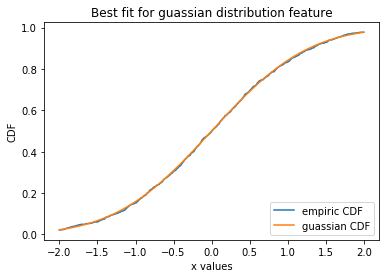

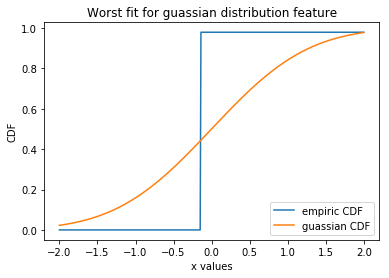

In [11]:
# Question 10:
# Compute the MLE estimators for the Gaussian distribution per feature in the "walk" class:

import pandas as pd

samsungData = pd.read_csv('samsungData.csv')
samsungData = samsungData.drop(['Unnamed: 0'], axis=1)
num_examples, num_features = samsungData.shape
print 'Started running. Please wait, this may take up to 1 minute.'
# fetch the data of the "walk" class:
walk_data = samsungData.loc[samsungData['activity'] == 'walk']
walk_data = walk_data.drop(['activity'],axis=1)

# Define functions to calculate mu and sigma, according to the Guassian distribution MLE equations we learned in class:
def MLE_mu(data):
    return np.mean(data)

def MLE_sigma(data):
    return math.sqrt(np.var(data))

def MLE_column(data):
    return pd.Series.from_array([MLE_mu(data), MLE_sigma(data)])

# calculate the MLE estimators for each feature:
MLE_df = walk_data.apply(MLE_column, raw=True)
MLE_df.insert(0,'parameter',['mu', 'sigma'])


# save the results on a csv file (too big to print)
MLE_df.to_csv('MLE_df.csv')
walk_data_normalized = (walk_data - walk_data.mean())/walk_data.std() #normalize.

# use the same method from Question 1 in order to figure out which feature is the closest to be a Guassian:

x_values = np.arange(-2,2.01,0.01)

# The true normal CDF
from scipy.stats import norm
#def cal_specific_CDF(x_values, mu, sigma):
#    CDF = []
#    for x in x_values:
#        CDF.append(norm(mu, sigma).cdf(x))
#    return CDF

# The empiric CDF
def empiric_CDF_calc(data):
    empirical_CDF = []
    empiric_val = 0
    i = 0
    for x in x_values:
        empirical_CDF.append(0)
        for sample in data:
            if (sample < x):
                empirical_CDF[i] += 1
        empirical_CDF[i] = empirical_CDF[i] / float(len(data))
        i += 1
    return empirical_CDF[:]

# calc the empiric CDF for each feature (by class "walk"):
def empiric_CDF_column(data):
    return pd.Series.from_array(empiric_CDF_calc(data))
empiric_CDF_df = walk_data_normalized.apply(empiric_CDF_column)
#empiric_CDF_df.to_csv('empiric_CDF_df.csv')    
    
## calc the guassian CDF for each feature (by class "walk"):
#MLE_df_data =  MLE_df.drop(['parameter'],axis=1)
#def guassian_CDF_column(data):
#    return pd.Series.from_array(cal_specific_CDF(x_values, *data))

#guassian_CDF_df = walk_data_normalized.apply(guassian_CDF_column)
#guassian_CDF_df.to_csv('guassian_CDF_df.csv') 

#guassian_CDF_df = pd.read_csv('guassian_CDF_df.csv')



# The best and worst match to Guassian in matter of max(empiric_CDF(x) - guassian_CDF(x)):
best_feature = ""
global_best_CDF_diff = 0
worst_feature = ""
global_worst_CDF_diff = 0
normalDistCdf = norm.cdf(x_values)
for column in MLE_df_data:
    max_CDF_diff = 0
    diff = abs(empiric_CDF_df[column] - normalDistCdf)
    diff = max(diff)
    max_CDF_diff = max(max_CDF_diff, diff)

    if (max_CDF_diff > global_worst_CDF_diff):
        global_worst_CDF_diff = max_CDF_diff
        worst_feature = column

    if ((max_CDF_diff < global_best_CDF_diff) or (global_best_CDF_diff == 0)):
        global_best_CDF_diff = max_CDF_diff
        best_feature = column

# print the results:
print '''The feature that best fits the Guassian distribution is: ''', best_feature
print '''The feature that worst fits the Guassian distribution is: ''', worst_feature
print '''In order to justify our answer, we used the metric that was proposed in question 1, which
means: max(empiric_CDF(x) - guassian_CDF(x)). In order to do that, we calculated the empiric CDF for each feature,
and also the guassian CDF (by the mu and sigma MLE estimators), and then found the best and worst matches.
below is the graphs of the best and worst matches:'''
print ""

plt.figure()
plt.plot(x_values, empiric_CDF_df[best_feature], label="empiric CDF")
plt.plot(x_values, normalDistCdf, label="guassian CDF")
plt.legend(loc='lower right')
plt.ylabel('CDF')
plt.xlabel('x values')
plt.title("Best fit for guassian distribution feature")
plt.show()

plt.figure()
plt.plot(x_values, empiric_CDF_df[worst_feature], label="empiric CDF")
plt.plot(x_values,normalDistCdf, label="guassian CDF")
plt.legend(loc='lower right')
plt.ylabel('CDF')
plt.xlabel('x values')
plt.title("Worst fit for guassian distribution feature")
plt.show()
